In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
from scipy import stats

In [28]:
import pandas as pd

data = pd.read_csv("C:/Users/Admin/Downloads/archive/calories.csv")
data.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [29]:
# Xem thông tin dữ liệu data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [30]:
# Loại bỏ các ký tự không phải số trong cột năng lượng (cals và kj)
import re
for i in data.index:
    data.Cals_per100grams[i]=re.sub('[^0-9]','', data.Cals_per100grams[i])
for i in data.index:
    data.KJ_per100grams[i]=re.sub('[^0-9]','', data.KJ_per100grams[i])
data.sample(10)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
801,Venison&Game,Lamb,100g,202,848
715,Poultry&Fowl,Chicken Wings,100g,266,1117
29,Fruits,Acai,100g,70,294
1345,Wine,Sparkling Wine,100ml,190,798
656,Offal&Giblets,Pig Heart,100g,148,622
118,Tropical&ExoticFruits,Soursop Fruit,100g,66,277
232,FastFood,Burger King Angry Whopper,100g,255,1071
1459,"Oatmeal,Muesli&Cereals",Rice Krispies,100g,394,1655
1858,BakingIngredients,Hazelnuts,100g,628,2638
1745,Nuts&Seeds,Watermelon,100g,30,126


In [31]:
# chuyển cột cals và KJ thành dạng số
data['Cals_per100grams']=data['Cals_per100grams'].astype(str).astype(int)
data['KJ_per100grams']=data['KJ_per100grams'].astype(str).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   int32 
 4   KJ_per100grams    2225 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 69.7+ KB


In [32]:
data.isnull().sum()

FoodCategory        0
FoodItem            0
per100grams         0
Cals_per100grams    0
KJ_per100grams      0
dtype: int64

In [33]:
data_sum = (data.groupby('FoodCategory')['FoodItem', 'Cals_per100grams'].agg({'FoodItem': 'count', 'Cals_per100grams': 'mean'}).sort_values(by='Cals_per100grams', ascending=False)).reset_index()
data_sum

<ipython-input-33-d12dcf64d055>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_sum = (data.groupby('FoodCategory')['FoodItem', 'Cals_per100grams'].agg({'FoodItem': 'count', 'Cals_per100grams': 'mean'}).sort_values(by='Cals_per100grams', ascending=False)).reset_index()


,FoodCategory,FoodItem,Cals_per100grams
0,VegetableOils,33,875.363636
1,Oils&Fats,30,819.766667
2,Nuts&Seeds,39,439.794872
3,Candy&Sweets,81,424.592593
4,Spreads,39,382.205128
5,"Oatmeal,Muesli&Cereals",76,374.407895
6,CerealProducts,44,359.886364
7,Cheese,53,342.735849
8,SlicedCheese,34,328.647059
9,BakingIngredients,95,324.168421


<AxesSubplot:ylabel='FoodCategory'>

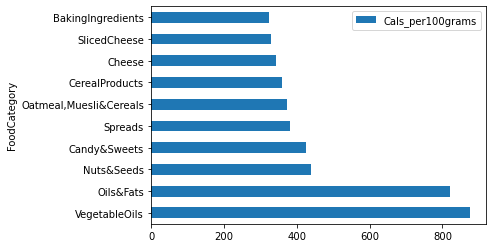

In [34]:
# 10 món ăn có calo cao nhất
data_top10=data_sum.iloc[0:10]
data_top10.plot(kind='barh', y="Cals_per100grams", x="FoodCategory")

In [35]:
data.describe()

,Cals_per100grams,KJ_per100grams
count,2225.000000,2225.000000
mean,236.648989,993.906966
std,187.021780,785.485331
min,0.000000,0.000000
25%,82.000000,344.000000
50%,218.000000,916.000000
75%,344.000000,1445.000000
max,1009.000000,4238.000000


In [36]:
print("Giá trị trung bình của data:")
pd.DataFrame(data.mean())

Giá trị trung bình của data:


,0
Cals_per100grams,236.648989
KJ_per100grams,993.906966


In [37]:
print('min của data:')
pd.DataFrame(data.min(skipna= True, numeric_only= True))

min của data:


,0
Cals_per100grams,0
KJ_per100grams,0


In [38]:
print('max của data:')
pd.DataFrame(data.max(skipna= True, numeric_only= True))

max của data:


,0
Cals_per100grams,1009
KJ_per100grams,4238
